 # Project

## Synthesising a Dataset for Car Details

### Goal

The goal of this project is to create a data set by simulating car sales in Ireland and creating variables such as the county it was sold in, the colour of it, its type and price deprication because of its colour.

For the project the following had to be carried out:

• Create a dataset for a real-world phenomenon that can be measured with at least one-hundred data points across at least four different variables.

• Investigate the types of variables involved, their likely distributions, and their relationships with each other.

• Synthesise/simulate a data set as closely matching their properties as possible.

• Detail the research and implement the simulation in a Jupyter notebook with the data set displayed in an output cell within the notebook.

### Information on the Car Dataset

The car dataset will simulate a data set for new car sales in Ireland. The main data will come from information and datasets on Motorstats [1]. From here the sales per car per car type, month sold, colour and county will be used to help create the data.

After this a sales price will be given to each car for what it sold at. The Society of the Irish Motor Industry keeps a record every year of pricing documents for new cars for sale in Ireland [2]. This will be used to help give each car record a price.

Lastly each car record will have a sale price 3 years after taking into account its price, colour and price deprecation. The resale value of a car has been found to be effected by the colour of the car [3]. For the price deprication a study of 1.6 million US cars sales after 3 years with the colour of the car being measured will be used [4].

## Creating the Dataset

### Read in the stats and variables to be used

In [462]:
# Import libraries
# Numpy for arrays and mathematical functions
import numpy as np
# Pandas for loading the dataset to dataframes for easy manipulation
import pandas as pd
# Matplotlib for ploting and visualising the data
import matplotlib.pyplot as plt

In [463]:
# Increase the rows and columns that pandas can display so full datasets can be visable
pd.options.display.max_columns = 10
pd.options.display.max_rows = 1000

Data for the sales per month is gotton from SIMI [1]. For this project the year 2019 will be used due to 2020 and 2021 car sales being effected by the pandemic. An excel with that info can be read in using pandas. 

In [464]:
montly_sales_df = pd.read_excel("total-car-registrations.xlsx", skiprows=6, usecols="B:M")  

Prep the data by transposing it, naming the column to relevent and then printing to screen

In [465]:
montly_sales_df = montly_sales_df.T

In [466]:
montly_sales_df.columns = ['Sales']

In [467]:
montly_sales_df

,Sales
Jan,32370
Feb,15069
Mar,16687
Apr,8904
May,6320
Jun,1408
Jul,24681
Aug,5088
Sep,3418
Oct,2179


The sales for 2019 can be shown in the graph below with January and July showing the greatest numbers.

Text(0.5, 1.0, 'Irish Car Sales by Month 2019')

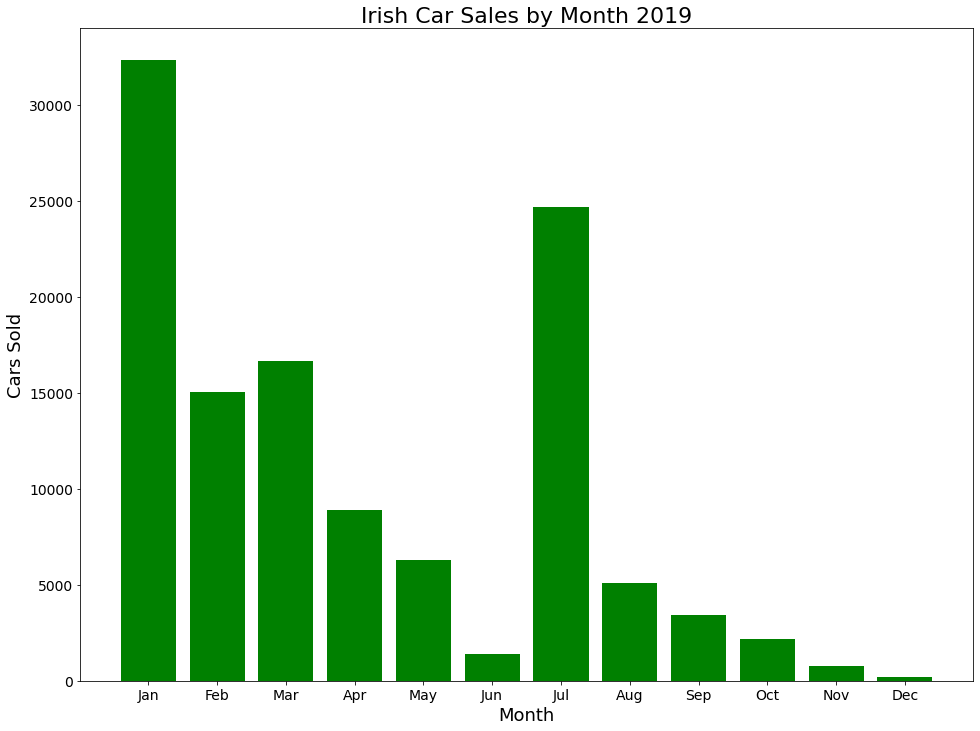

In [468]:
# Increase the size of the graph
plt.figure(figsize=(16, 12))
# Can use the column names in panda to quickly graph each value against each other in matplotlib
# A bar chart using the sales and month data from the dataset in green
plt.bar(montly_sales_df.index, montly_sales_df["Sales"], color='green')
# Add labels to the x,y axis and increase size
plt.xlabel('Month', size=18)
plt.ylabel('Cars Sold', size=18)
# Increase x and y tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Large title for the plot
plt.title("Irish Car Sales by Month 2019", size=22)

The county sales variables will also be taking from SIMI [1]. The dataset can be seen below.

In [469]:
county_sales_df = pd.read_excel("passenger-cars-by-county.xlsx", skiprows=6, usecols="B:D")  

In [470]:
county_sales_df

,County,2019 Units,% Share
0,Carlow,1255,1.07
1,Cavan,1167,1.00
2,Clare,2245,1.92
3,Cork,13981,11.94
4,Donegal,2331,1.99
5,Dublin,52067,44.46
6,Galway,4300,3.67
7,Kerry,2310,1.97
8,Kildare,4452,3.80
9,Kilkenny,2066,1.76


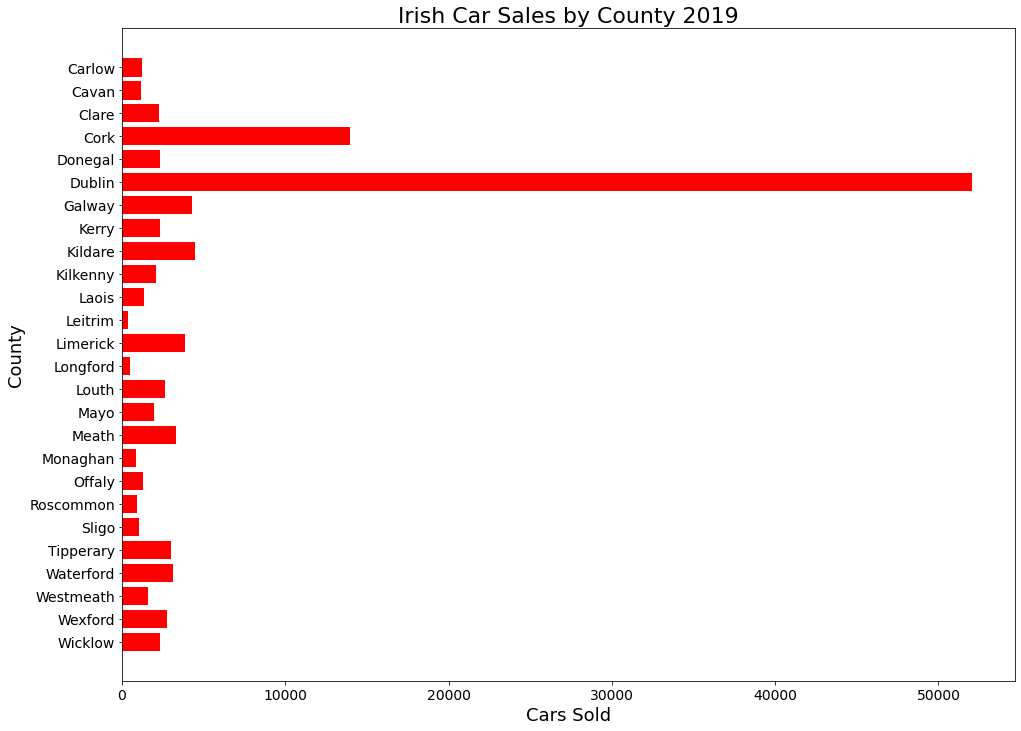

In [471]:
# Increase the size of the graph
plt.figure(figsize=(16, 12))
# Can use the column names in panda to quickly graph each value against each other in matplotlib
# A bar chart using the sales and county data from the dataset in red
plt.barh(county_sales_df["County"], county_sales_df["2019 Units"], color='red')
# Add labels to the x,y axis and increase size
plt.xlabel('Cars Sold', size=18)
plt.ylabel('County', size=18)
# Increase x and y tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Large title for the plot
plt.title("Irish Car Sales by County 2019", size=22)
# Reverse order of y axis to match the data alphabetical county order for readability
plt.gca().invert_yaxis()

In [472]:
car_model_sales_df = pd.read_excel("passenger-cars-by-model.xlsx", skiprows=6, usecols="A:E")

In [473]:
car_model_sales_df

,Rank,Make,Model,2019 Units,% Share
0,1,TOYOTA,COROLLA,4406,3.76
1,2,HYUNDAI,TUCSON,3828,3.27
2,3,NISSAN,QASHQAI,3748,3.20
3,4,VOLKSWAGEN,TIGUAN,3201,2.73
4,5,SKODA,OCTAVIA,3199,2.73
5,6,HYUNDAI,KONA,2939,2.51
6,7,VOLKSWAGEN,GOLF,2823,2.41
7,8,FORD,FOCUS,2766,2.36
8,9,TOYOTA,YARIS,2554,2.18
9,10,TOYOTA,C-HR,2503,2.14


In [474]:
# Limit the data the top 12 Cars in 2019 for ease of working with the data.
# This is instead of the 297 differnet makes of car from the data
car_model_sales_df = car_model_sales_df.head(12)

In [475]:
# Display cleaned up data
car_model_sales_df

,Rank,Make,Model,2019 Units,% Share
0,1,TOYOTA,COROLLA,4406,3.76
1,2,HYUNDAI,TUCSON,3828,3.27
2,3,NISSAN,QASHQAI,3748,3.20
3,4,VOLKSWAGEN,TIGUAN,3201,2.73
4,5,SKODA,OCTAVIA,3199,2.73
5,6,HYUNDAI,KONA,2939,2.51
6,7,VOLKSWAGEN,GOLF,2823,2.41
7,8,FORD,FOCUS,2766,2.36
8,9,TOYOTA,YARIS,2554,2.18
9,10,TOYOTA,C-HR,2503,2.14


Text(0.5, 1.0, 'Irish Car Sales by Make & Model 2019')

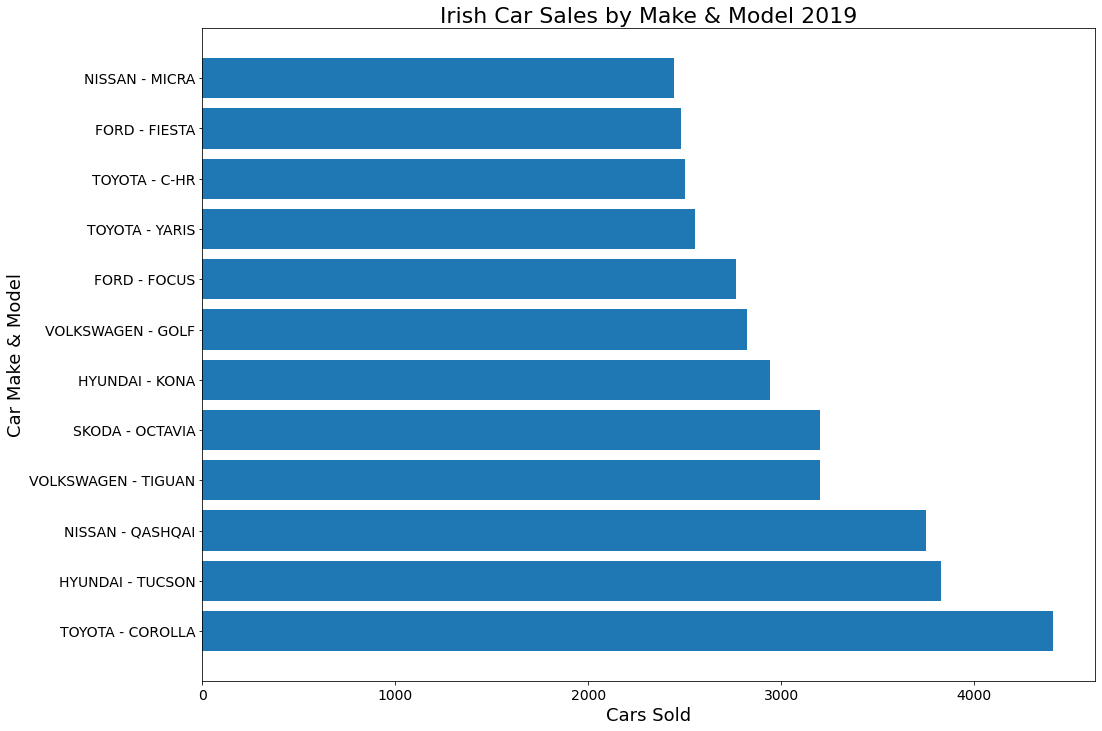

In [476]:
# Increase the size of the graph
plt.figure(figsize=(16, 12))
# Can use the column names in panda to quickly graph each value against each other in matplotlib
# A bar chart using the sales and make/model data from the dataset
plt.barh(car_model_sales_df["Make"] + " - " + car_model_sales_df["Model"], car_model_sales_df["2019 Units"])
# Add labels to the x,y axis and increase size
plt.xlabel('Cars Sold', size=18)
plt.ylabel('Car Make & Model', size=18)
# Increase x and y tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Large title for the plot
plt.title("Irish Car Sales by Make & Model 2019", size=22)

In [477]:
colour_sales_df = pd.read_excel("passenger-cars-by-colour.xlsx", skiprows=6, usecols="A:G")

In [478]:
colour_sales_df

,Rank,Colour,2019 Units,% Share
0,1,Grey,43535,37.17
1,2,Black,21021,17.95
2,3,White/Ivory,17359,14.82
3,4,Blue,16666,14.23
4,5,Red/Maroon,13710,11.71
5,6,Brown,1791,1.53
6,7,Green,730,0.62
7,8,Orange,714,0.61
8,9,White/Ivory and Black,306,0.26
9,10,Red/Maroon and Black,253,0.22


In [479]:
# Limit data to colours with minimum 100 sales in 2019
colour_sales_df = colour_sales_df[colour_sales_df["2019 Units"] >= 100]

In [480]:
# Filter out NA colours
colour_sales_df = colour_sales_df.dropna()

In [481]:
# Filter out multiple colours
colour_sales_df = colour_sales_df[~colour_sales_df['Colour'].str.contains("and")]

In [482]:
# Change Red/Maroon and White/Ivory to Red and White respectivly to clean up the data
colour_sales_df.loc[2,'Colour'] = "White"
colour_sales_df.loc[4,'Colour'] = "Red"

In [483]:
# Redisplay the data post cleanup
colour_sales_df

,Rank,Colour,2019 Units,% Share
0,1,Grey,43535,37.17
1,2,Black,21021,17.95
2,3,White,17359,14.82
3,4,Blue,16666,14.23
4,5,Red,13710,11.71
5,6,Brown,1791,1.53
6,7,Green,730,0.62
7,8,Orange,714,0.61
10,11,Yellow,252,0.22


Text(0.5, 1.0, 'Irish Car Sales by Colour 2019')

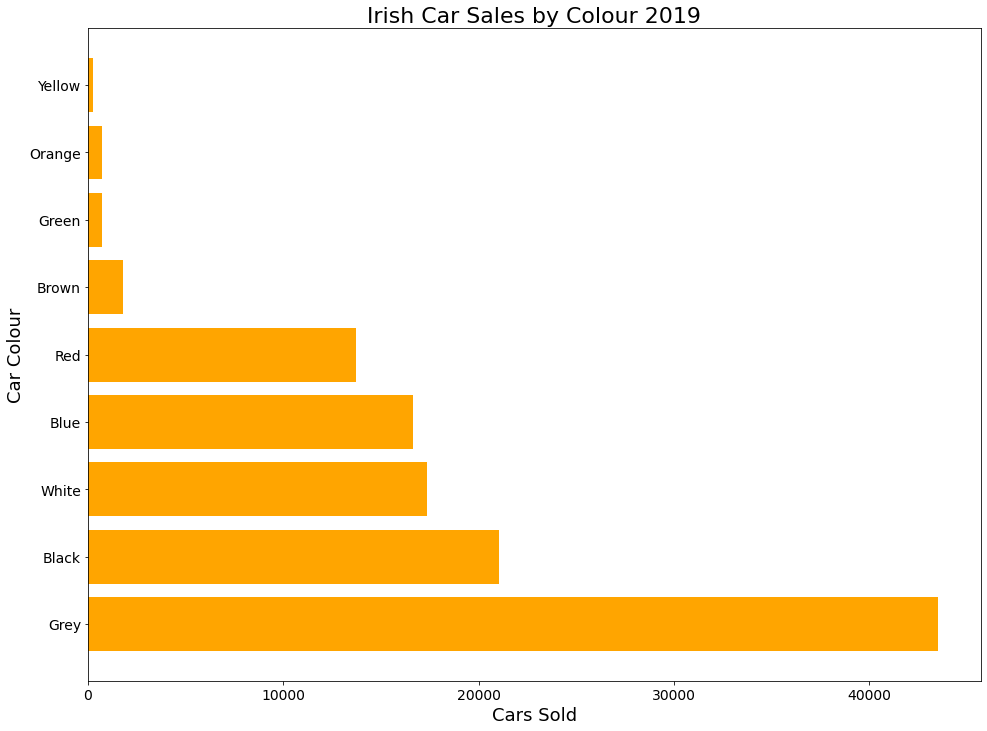

In [484]:
# Increase the size of the graph
plt.figure(figsize=(16, 12))
# Can use the column names in panda to quickly graph each value against each other in matplotlib
# A bar chart using the sales and colour data from the dataset
plt.barh(colour_sales_df["Colour"], colour_sales_df["2019 Units"], color='orange')
# Add labels to the x,y axis and increase size
plt.xlabel('Cars Sold', size=18)
plt.ylabel('Car Colour', size=18)
# Increase x and y tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Large title for the plot
plt.title("Irish Car Sales by Colour 2019", size=22)

For each colour to be used in the data a dictionary to tie the 3 year % deprecation added. This data was got from iseecars.com's study of 1.3 million car sales [4].

In [485]:
colour_deprecation = {"Grey": 29.5,
                      "Black": 30.2,
                      "White": 29.5,
                      "Blue": 29.9,
                      "Red": 29.1,
                      "Brown": 28.5,
                      "Green": 24.5,
                      "Orange": 21.6,
                      "Yellow": 22.0}

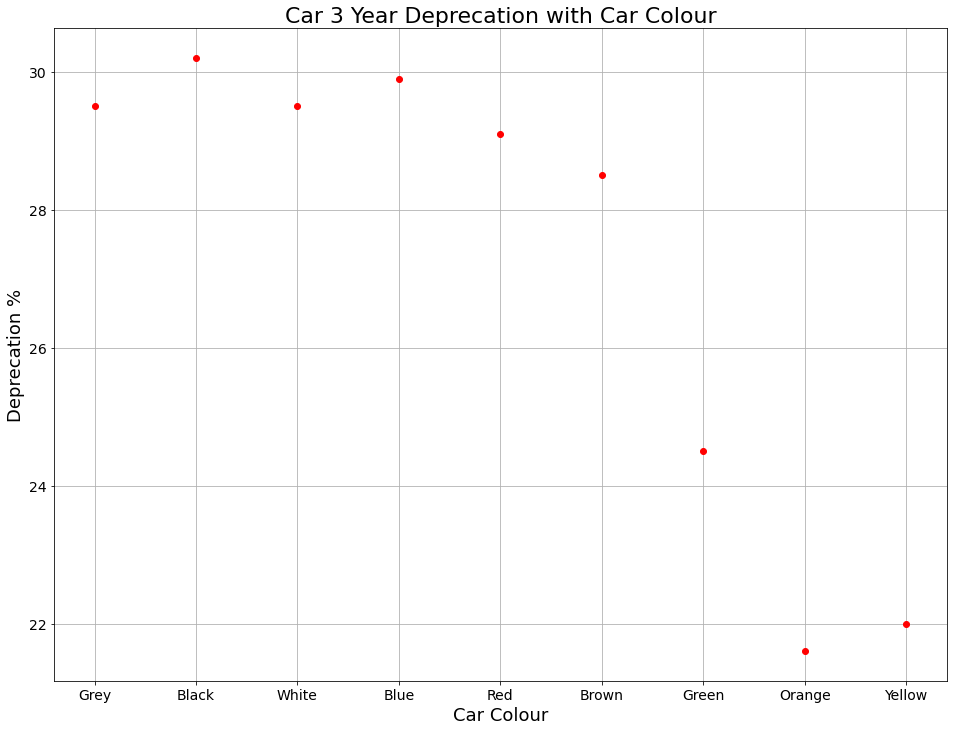

In [486]:
# Increase the size of the graph
plt.figure(figsize=(16, 12))
# Can use the column names in panda to quickly graph each value against each other in matplotlib
# A graph with red dots for each data point
plt.plot(*zip(*colour_deprecation.items()), "or")
# Add labels to the x,y axis and increase size
plt.xlabel('Car Colour', size=18)
plt.ylabel('Deprecation %', size=18)
# Increase x and y tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Large title for the plot
plt.title("Car 3 Year Deprecation with Car Colour", size=22)
# Add grid to graph
plt.grid(True)

For the price data for the cars it was taken from the archives of the Society of the Irish Motor Industry price guides using pricing information from each manufacture [2]. All data used the January 2019 edition of this guide bar the C-HR, KONA and TUCSON car models. For the KONA and TUSCON the data was gotten from the December 2019 guide as they were not on the January one. The C-HR wasnt on either so price data was gotten from Toyotas website using the August 2021 values [5].

This data was collated and added to an excel for the project so it could be read to get the information to create pricing for each car in the synthesised dataset.

In [487]:
model_prices_df = pd.read_excel("model-price.xlsx")

In [488]:
model_prices_df

,MODEL,PRICE,Date
0,YARIS,14995,2019-01-01
1,YARIS,15995,2019-01-01
2,YARIS,16090,2019-01-01
3,YARIS,17505,2019-01-01
4,YARIS,15995,2019-01-01
5,YARIS,16500,2019-01-01
6,YARIS,16595,2019-01-01
7,YARIS,17995,2019-01-01
8,YARIS,17350,2019-01-01
9,YARIS,18780,2019-01-01


In [489]:
# Get standard deviation and mean for each models price
# Lists hold data for standard deviation and mean
mean_list = []
std_list = []

# Get all unique car models to a series
unique_car_models = model_prices_df["MODEL"].unique()

# For every model calcuate the mean and std values
for car_model in unique_car_models:
    mean_list.append(model_prices_df[model_prices_df["MODEL"] == car_model].mean()[0])
    std_list.append(model_prices_df[model_prices_df["MODEL"] == car_model].std()[0])
    

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [490]:
# Create dataframe for graphing and using for creating synthesised dataset
model_prices_stats_df = pd.DataFrame(list(zip(unique_car_models, mean_list, std_list)),
               columns =["MODEL", "MEAN", "STD"])

In [491]:
model_prices_stats_df

,MODEL,MEAN,STD
0,YARIS,17379.285714,1396.199315
1,TUCSON,35620.000000,5731.194545
2,OCTAVIA,29230.500000,4879.995389
3,QASHQAI,32078.518519,3404.640164
4,FIESTA,19896.176471,2261.143605
5,FOCUS,29503.125000,5164.211039
6,GOLF,24867.222222,2834.347481
7,MICRA,17145.000000,1322.875656
8,TIGUAN,36086.250000,4317.375815
9,COROLLA,23838.750000,1942.413355


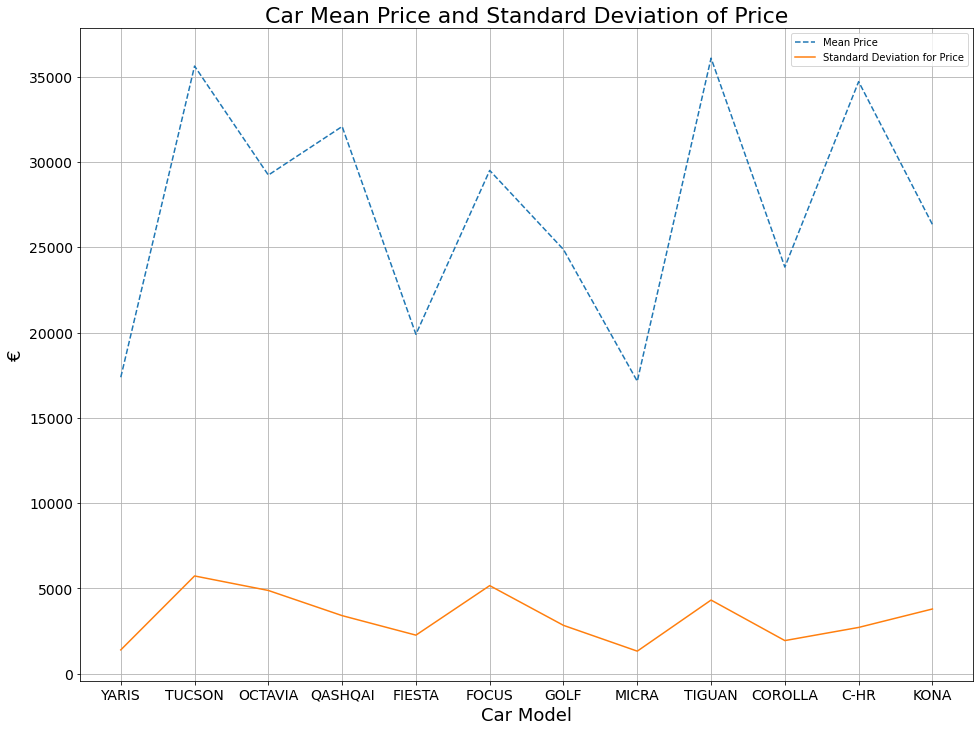

In [492]:
# Increase the size of the graph
plt.figure(figsize=(16, 12))
# Can use the column names in panda to quickly graph each value against each other in matplotlib
# Two graphs for mean price and standard deviation for car models with different lines
plt.plot(model_prices_stats_df["MODEL"], model_prices_stats_df["MEAN"], "--")
plt.plot(model_prices_stats_df["MODEL"], model_prices_stats_df["STD"], "-")
# Add labels to the x,y axis and increase size
plt.xlabel('Car Model', size=18)
plt.ylabel('€', size=18)
# Increase x and y tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Large title for the plot
plt.title("Car Mean Price and Standard Deviation of Price", size=22)
# Add grid to graph
plt.grid(True)
plt.legend(["Mean Price", "Standard Deviation for Price"])

### Creating the Simulated Data

Next Pandas and Numpy can be used to create the simulated data using the real world data gathered and analysed earlier to dataframes. A dataframe will be created to hold all the new data of 1000 simulated rows.

In [493]:
# Get the probability for each car to help create a non-uniform distribution
car_model_sales_df["Probability"] = car_model_sales_df["2019 Units"]/car_model_sales_df["2019 Units"].sum()

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [494]:
# Display dataframe with probability
car_model_sales_df

,Rank,Make,Model,2019 Units,% Share,Probability
0,1,TOYOTA,COROLLA,4406,3.76,0.119443
1,2,HYUNDAI,TUCSON,3828,3.27,0.103774
2,3,NISSAN,QASHQAI,3748,3.20,0.101605
3,4,VOLKSWAGEN,TIGUAN,3201,2.73,0.086776
4,5,SKODA,OCTAVIA,3199,2.73,0.086722
5,6,HYUNDAI,KONA,2939,2.51,0.079674
6,7,VOLKSWAGEN,GOLF,2823,2.41,0.076529
7,8,FORD,FOCUS,2766,2.36,0.074984
8,9,TOYOTA,YARIS,2554,2.18,0.069237
9,10,TOYOTA,C-HR,2503,2.14,0.067854


Using the probabilites gotten from the real world data and numpy's random choice function will help create the data. This will be a non-uniform random sample as the probability is being fed to the function. The data should be non-uniform as the make of car is tied to the number of sales so the real world probabilities will be used. 1000 non-uniform random values will be generated.

In [495]:
random_models = np.random.choice(car_model_sales_df["Model"], 1000, p=car_model_sales_df["Probability"])

In [496]:
# Create a dataframe to hold all the simulate data
car_simulated_df = pd.DataFrame({'Model': random_models})

In [497]:
# Display the dataset so far
car_simulated_df

,Model
0,KONA
1,C-HR
2,YARIS
3,TIGUAN
4,COROLLA
5,FIESTA
6,QASHQAI
7,FIESTA
8,TIGUAN
9,GOLF


In [498]:
# Get and print the total of each make of car
total_simulated_cars = car_simulated_df.Model.value_counts()
total_simulated_cars

TUCSON     122
COROLLA    119
QASHQAI     96
GOLF        85
FOCUS       78
KONA        78
OCTAVIA     77
TIGUAN      74
C-HR        73
YARIS       72
FIESTA      65
MICRA       61
Name: Model, dtype: int64

Text(0.5, 1.0, 'Irish Car Sales by Make - Simulated')

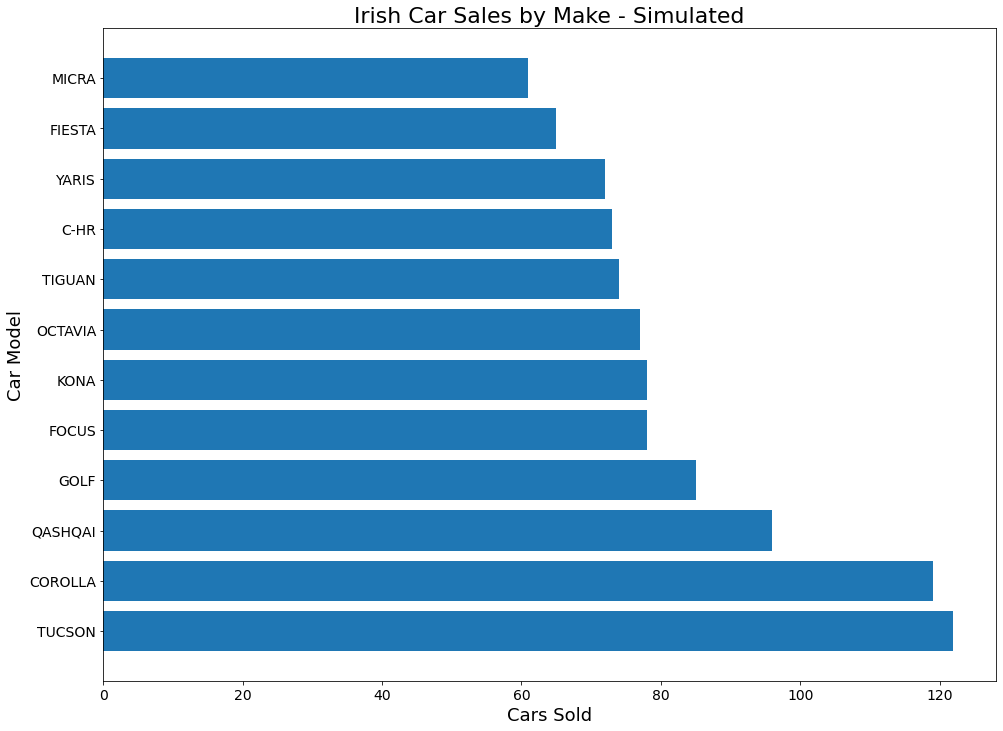

In [499]:
# Increase the size of the graph
plt.figure(figsize=(16, 12))
# Can use the column names in panda to quickly graph each value against each other in matplotlib
# A bar chart using the car model data from the dataset by counting the occurances of each item
plt.barh(total_simulated_cars.index, total_simulated_cars)
# Add labels to the x,y axis and increase size
plt.xlabel('Cars Sold', size=18)
plt.ylabel('Car Model', size=18)
# Increase x and y tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Large title for the plot
plt.title("Irish Car Sales by Make - Simulated", size=22)

Next the county data will be appended to the dataset. Like make this data has a non-uniform distribution accross the 26 counties. For example a car sale in Dublin has a far higher probability than any other county. The probability of each item will be calculated and used with numpy's random choice function to generate random countys for 1000 values.

In [500]:
# Get the probability for each car to be sold in a given county to help create a non-uniform distribution
county_sales_df["Probability"] = county_sales_df["2019 Units"]/county_sales_df["2019 Units"].sum()

In [501]:
# Display dataframe with probability
county_sales_df

,County,2019 Units,% Share,Probability
0,Carlow,1255,1.07,0.010717
1,Cavan,1167,1.00,0.009965
2,Clare,2245,1.92,0.019170
3,Cork,13981,11.94,0.119385
4,Donegal,2331,1.99,0.019905
5,Dublin,52067,44.46,0.444603
6,Galway,4300,3.67,0.036718
7,Kerry,2310,1.97,0.019725
8,Kildare,4452,3.80,0.038016
9,Kilkenny,2066,1.76,0.017642


In [502]:
# Using random choice to generate 1000 non-uniform countie values
random_counties = np.random.choice(county_sales_df["County"], 1000, p=county_sales_df["Probability"])

In [503]:
# Append the county data to the dataset and print it
car_simulated_df["County"] = random_counties
car_simulated_df

,Model,County
0,KONA,Dublin
1,C-HR,Cork
2,YARIS,Wicklow
3,TIGUAN,Dublin
4,COROLLA,Kerry
5,FIESTA,Dublin
6,QASHQAI,Galway
7,FIESTA,Dublin
8,TIGUAN,Dublin
9,GOLF,Limerick


In [504]:
# Get and print the total of each county
total_simulated_county = car_simulated_df.County.value_counts()
total_simulated_county

Dublin       415
Cork         122
Galway        41
Waterford     35
Kildare       34
Donegal       28
Kerry         27
Wicklow       27
Clare         27
Louth         25
Tipperary     22
Limerick      22
Wexford       22
Meath         20
Laois         19
Mayo          18
Westmeath     17
Offaly        17
Sligo         13
Kilkenny      13
Roscommon      9
Cavan          8
Carlow         7
Monaghan       5
Leitrim        5
Longford       2
Name: County, dtype: int64

Text(0.5, 1.0, 'Irish Car Sales by County - Simulated')

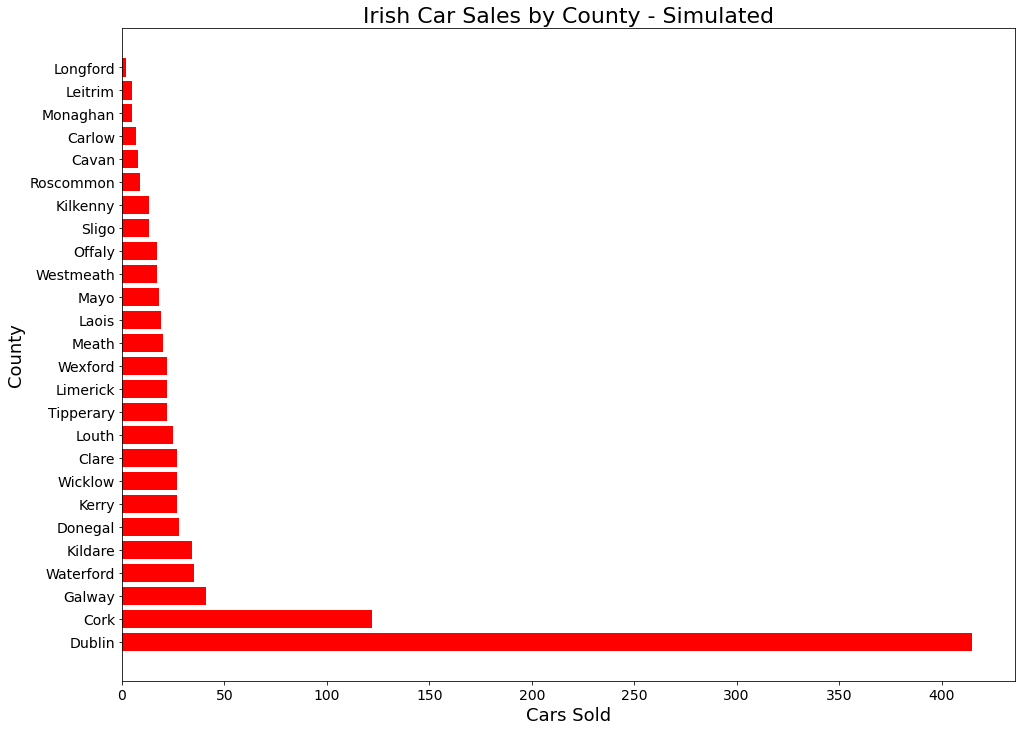

In [505]:
# Increase the size of the graph
plt.figure(figsize=(16, 12))
# Can use the column names in panda to quickly graph each value against each other in matplotlib
# A bar chart using the simulated sales and county data in red
plt.barh(total_simulated_county.index, total_simulated_county, color='red')
# Add labels to the x,y axis and increase size
plt.xlabel('Cars Sold', size=18)
plt.ylabel('County', size=18)
# Increase x and y tick font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Large title for the plot
plt.title("Irish Car Sales by County - Simulated", size=22)

### References
[1] Motorstats - Offical Statistics of the Irish Motor Industry
https://stats.beepbeep.ie/

[2] The Society of the Irish Motor Industry Price Data 
https://www.simi.ie/en/motorstats/recommended-price-guide   

[3] Which car colour will have the best impact on resale value?
https://www.junair-spraybooths.co.uk/blog/which-car-colour-is-best-resale-value/

[4] Color Does Matter in Car Resale Value
https://www.iseecars.com/car-color-study#v=2016

[5] Toyota C-HR Price Data (Accesed 30th August 2021)
https://www.toyota.ie/models/c-hr/index.json
 